## Dataset analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
path = 'data/raw/train.csv'
df = pd.read_csv(path, usecols=['anchor', 'target', 'context', 'score'])
df

anchor                  target context  score
0         abatement  abatement of pollution     A47   0.50
1         abatement          act of abating     A47   0.75
2         abatement         active catalyst     A47   0.25
3         abatement     eliminating process     A47   0.50
4         abatement           forest region     A47   0.00
...             ...                     ...     ...    ...
36468  wood article          wooden article     B44   1.00
36469  wood article              wooden box     B44   0.50
36470  wood article           wooden handle     B44   0.50
36471  wood article         wooden material     B44   0.75
36472  wood article        wooden substrate     B44   0.50

[36473 rows x 4 columns]

Statics on number of world

In [3]:
def stats_field(field):
    print('-------------------------------------------------')
    max_length = field.apply(lambda s: len(s)).max()
    min_length = field.apply(lambda s: len(s)).min()

    print(f'min:{min_length}\tmax:{max_length}')

    # sanity check
    idx_min = field.apply(lambda s: len(s)).idxmin()


    idx_max = field.apply(lambda s: len(s)).idxmax()
    print(f'min_val:{field[idx_min]}\tmin_val:{field[idx_max]}')

    max_length = field.apply(lambda s: len(s)).max()
    min_length = field.apply(lambda s: len(s)).min()

    print(f'min:{min_length}\tmax:{max_length}')
    print('-------------------------------------------------')


target = df['target'].astype(str)
stats_field(target)

df['anchor_context'] = df.apply(lambda row: row['anchor']+ ';'+ row['context'], axis=1)
a_context= df['anchor_context'].astype(str)
stats_field(a_context)




-------------------------------------------------
min:2	max:98
min_val:id	min_val:2s 6 5 3as4s6ar 2 oxo 133a466a hexahydrothieno34 dimidazol 4 ylpentanoylamino 2 azaniumylhexanoate
min:2	max:98
-------------------------------------------------
-------------------------------------------------
min:7	max:42
min_val:ack;G04	min_val:reflection type liquid crystal display;G02
min:7	max:42
-------------------------------------------------


Statistics on number of anchor

In [4]:
df_anchor = df.groupby('anchor')['context'].count()

In [5]:
tmp = df_anchor.to_dict()
data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True))

In [6]:
data

{'component composite coating': 152,
 'sheet supply roller': 150,
 'source voltage': 140,
 'perfluoroalkyl group': 136,
 'el display': 135,
 'average pore size': 133,
 'speed control means': 130,
 'parallel orientation': 127,
 'displacement mechanism': 124,
 'cathode layer': 118,
 'flow openings': 117,
 'electromagnetic radiation source': 115,
 'overall weight': 114,
 'central flow path': 111,
 'dimensional location': 109,
 'elastic assembly': 109,
 'conductor particles': 108,
 'hydrocarbyl substituted succinic': 108,
 'oxidizing enzyme': 107,
 'stabilizer members': 107,
 'nvm array': 106,
 'opposing walls': 105,
 'imaging axis': 104,
 'fluid flow source': 102,
 'produce liquid hydrocarbons': 102,
 'dual clutch': 101,
 'equipment unit': 101,
 'radio wave transmission': 101,
 'brake arms': 100,
 'coupling arms': 100,
 'materially less': 100,
 'pen based computer': 100,
 'smooth outer surface': 99,
 'return structure': 98,
 'component control': 97,
 'feed control valve': 97,
 'source cha

Text(0.5, 1.0, "Distribution of anchor's context ")

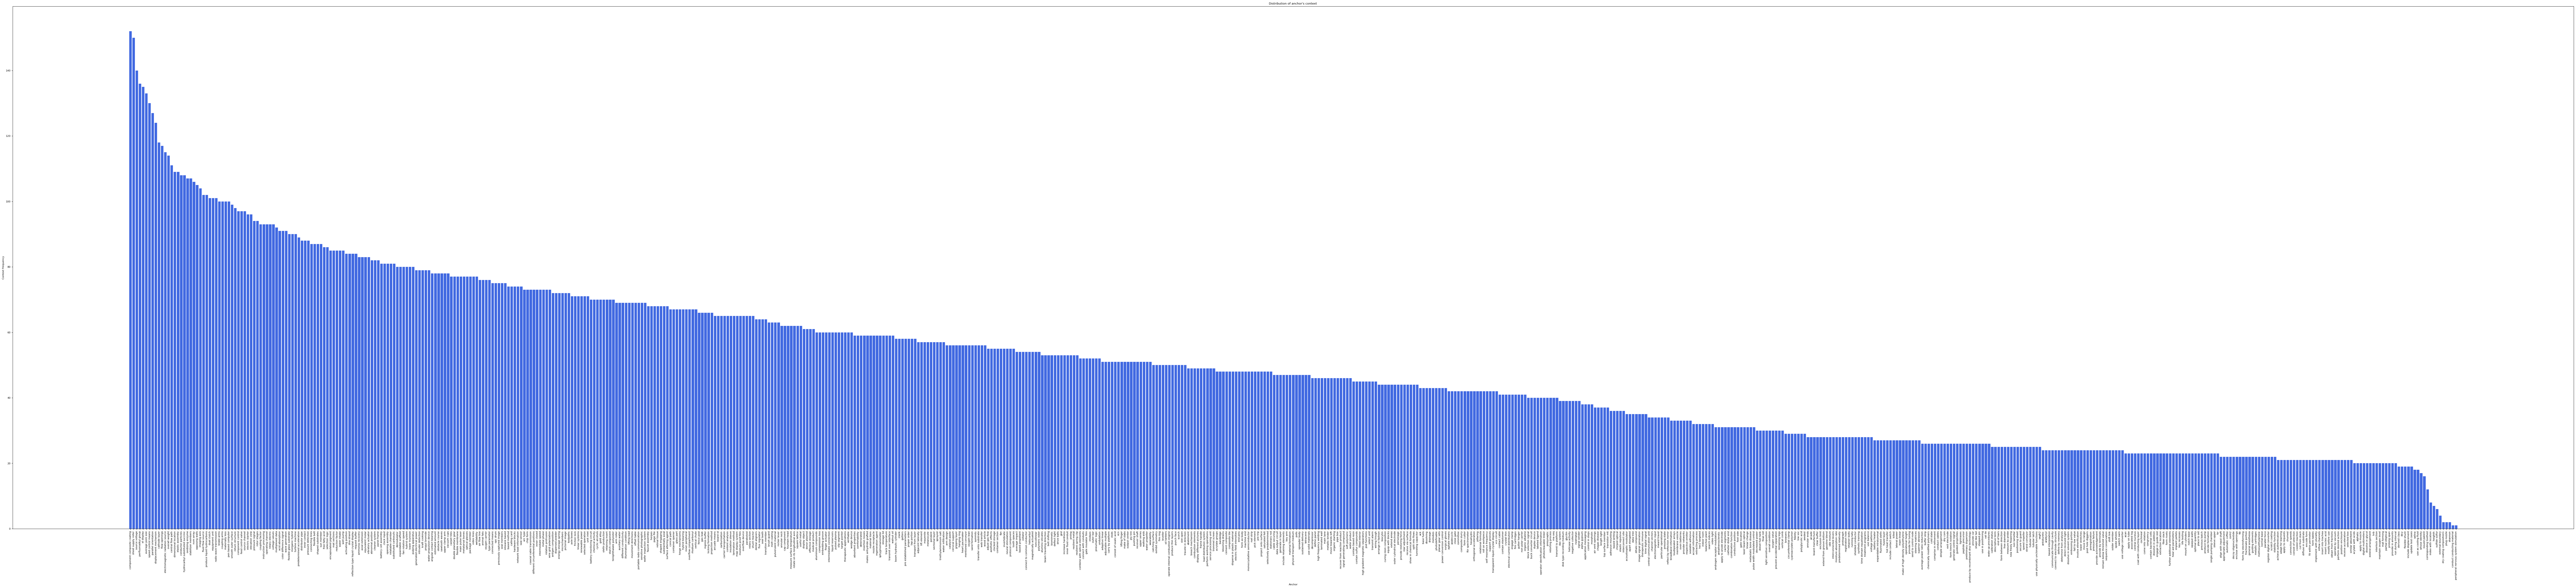

In [7]:
plt.rcParams.update({'font.size': 8})   

n = len(data.keys())
plt.figure(figsize=(n//5, 30))
plt.bar(data.keys(), data.values(), align='center', color='royalblue')
plt.xlabel('Anchor')
plt.ylabel('Context frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.title('Distribution of anchor\'s context ')

In [8]:
df['anchor'].unique().shape

(733,)

Statistics on anchor given the context

In [9]:
df['context'].unique().shape

(106,)

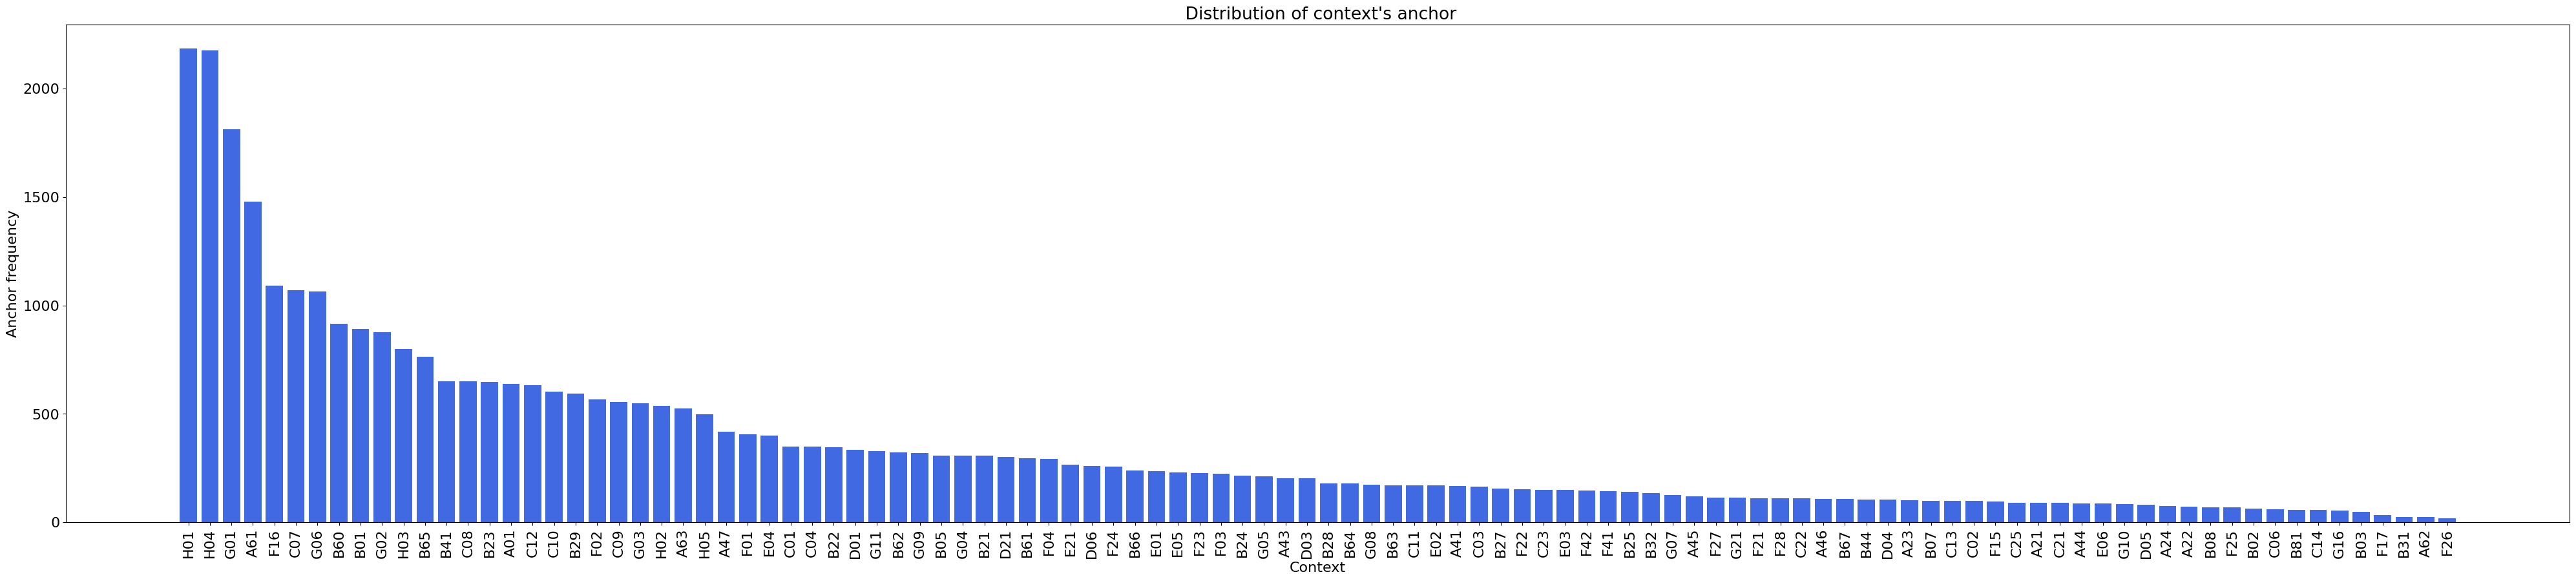

In [10]:
def plot_context_anchor_dist(df:pd.DataFrame,set_name:str='')->None:
    """ plot the context's anchor distribution given its dataframe
        df(pd.DataFrame): dataframe of set
        set_name(str)='': name of set 
    """
    df_context = df.groupby('context')['anchor'].count()
    tmp = df_context.to_dict()
    data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True))
    plt.rcParams.update({'font.size': 16})   

    n = len(data.keys())
    plt.figure(figsize=(50, 10))
    plt.bar(data.keys(), data.values(), align='center', color='royalblue')
    plt.xlabel('Context')
    plt.ylabel('Anchor frequency')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(f'{set_name} Distribution of context\'s anchor')
    
plot_context_anchor_dist(df)

In [11]:
sum( [ round(v/10,0) for v in data.values()])

3631.0

Split train into train and validation set

In [12]:
df['anchor_context'].unique().shape[0]

1699

In [13]:
df['anchor_context'].count()

36473

In [14]:
df_grouped = df.groupby('anchor_context')
df_grouped.indices

{'abatement;A47': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 'abatement;A61': array([21, 22, 23]),
 'abatement;A62': array([24]),
 'abatement;C01': array([25]),
 'abatement;F16': array([26]),
 'abatement;F24': array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45]),
 'abatement;F28': array([46]),
 'abatement;H01': array([47]),
 'abatement;H04': array([48]),
 'abnormal position;B23': array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68]),
 'abnormal position;B41': array([69, 70]),
 'abnormal position;D03': array([71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 'abnormal position;E03': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130]),
 'absorbent pr

In [15]:
df['val']=0
tmp =df_grouped.indices
df

anchor                  target context  score    anchor_context  \
0         abatement  abatement of pollution     A47   0.50     abatement;A47   
1         abatement          act of abating     A47   0.75     abatement;A47   
2         abatement         active catalyst     A47   0.25     abatement;A47   
3         abatement     eliminating process     A47   0.50     abatement;A47   
4         abatement           forest region     A47   0.00     abatement;A47   
...             ...                     ...     ...    ...               ...   
36468  wood article          wooden article     B44   1.00  wood article;B44   
36469  wood article              wooden box     B44   0.50  wood article;B44   
36470  wood article           wooden handle     B44   0.50  wood article;B44   
36471  wood article         wooden material     B44   0.75  wood article;B44   
36472  wood article        wooden substrate     B44   0.50  wood article;B44   

       val  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
36468    0  
36469    0  
36470    0  
36471    0  
36472    0  

[36473 rows x 6 columns]

In [16]:
for a_c, indices in tmp.items():
    
    tot_idx = indices.shape[0]
    n_idx = math.ceil(tot_idx/10)
    
    range_idx = df.index.isin(indices[:n_idx])
    df.loc[(range_idx) & (df['anchor_context'] == a_c), 'val'] = 1
 

In [17]:
# inefficient storage to meet kaggle test requirement
train_df = df[ df['val']==0]
train_df.to_csv('data/processed/train.csv', columns=['anchor', 'context', 'target','score'])
val_df = df[ df['val']==1]
val_df.to_csv('data/processed/val.csv', columns=['anchor', 'context',  'target', 'score'])


In [18]:
df[df['val']==1]

anchor                  target context  score    anchor_context  \
0         abatement  abatement of pollution     A47   0.50     abatement;A47   
1         abatement          act of abating     A47   0.75     abatement;A47   
2         abatement         active catalyst     A47   0.25     abatement;A47   
21        abatement      emission abatement     A61   0.50     abatement;A61   
24        abatement     pollution abatement     A62   0.50     abatement;A62   
...             ...                     ...     ...    ...               ...   
36419  wood article         article spinner     B05   0.00  wood article;B05   
36445  wood article                   board     B27   0.50  wood article;B27   
36446  wood article       article generator     B44   0.00  wood article;B44   
36447  wood article         article spinner     B44   0.00  wood article;B44   
36448  wood article        article spinning     B44   0.00  wood article;B44   

       val  
0        1  
1        1  
2        1  
21       1  
24       1  
...    ...  
36419    1  
36445    1  
36446    1  
36447    1  
36448    1  

[4545 rows x 6 columns]

Show distribution of the different sets

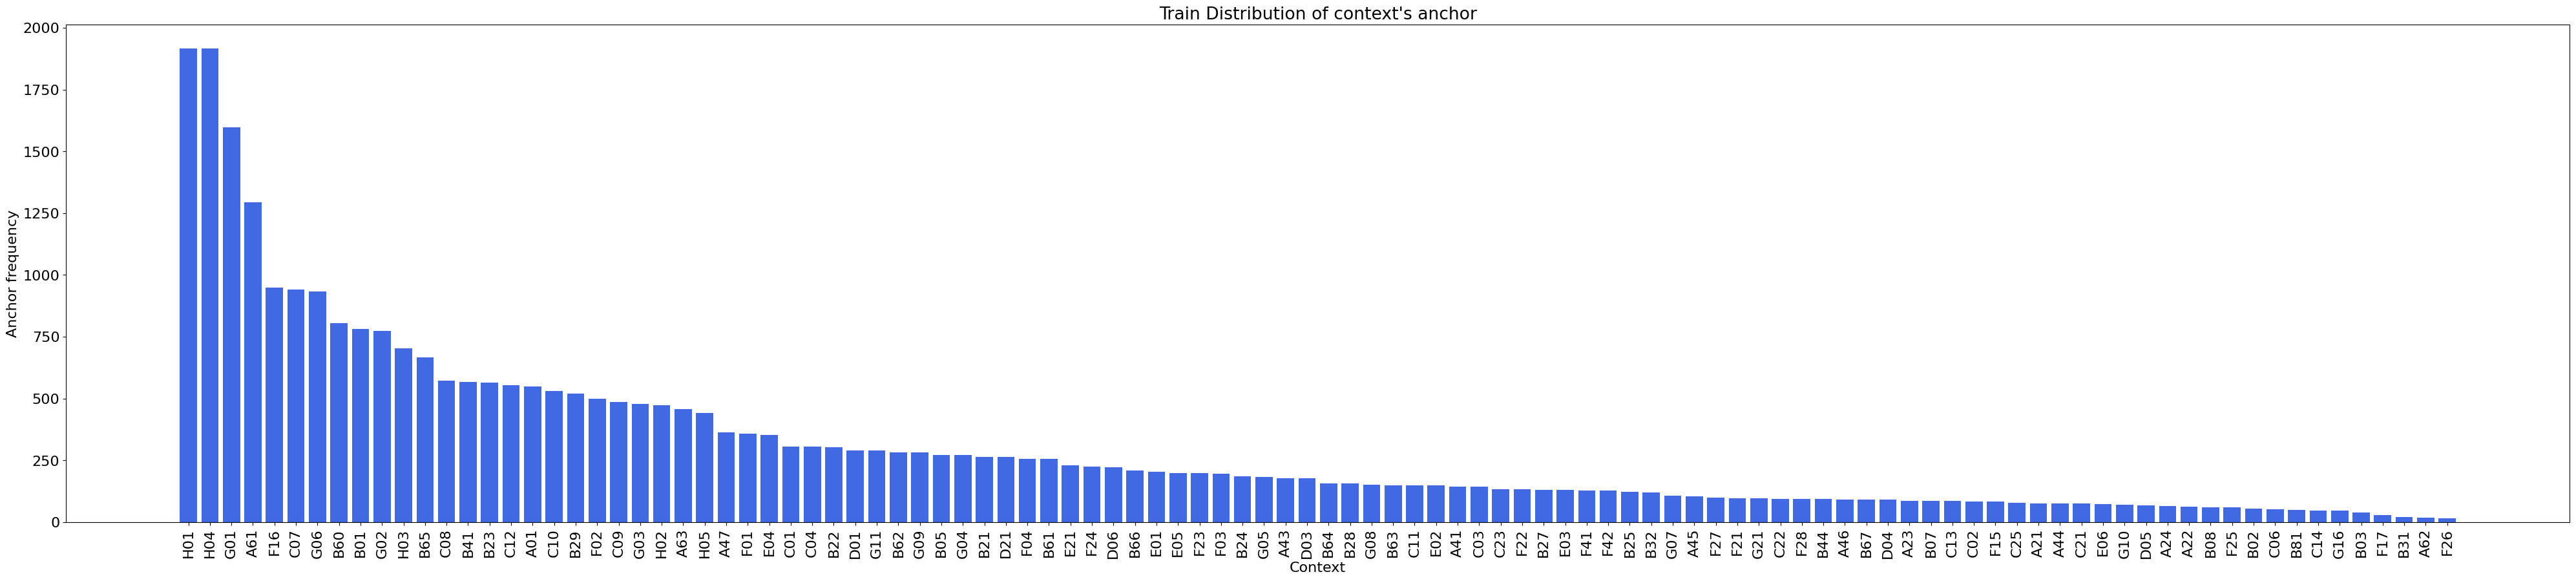

In [19]:
 plot_context_anchor_dist(train_df, 'Train')

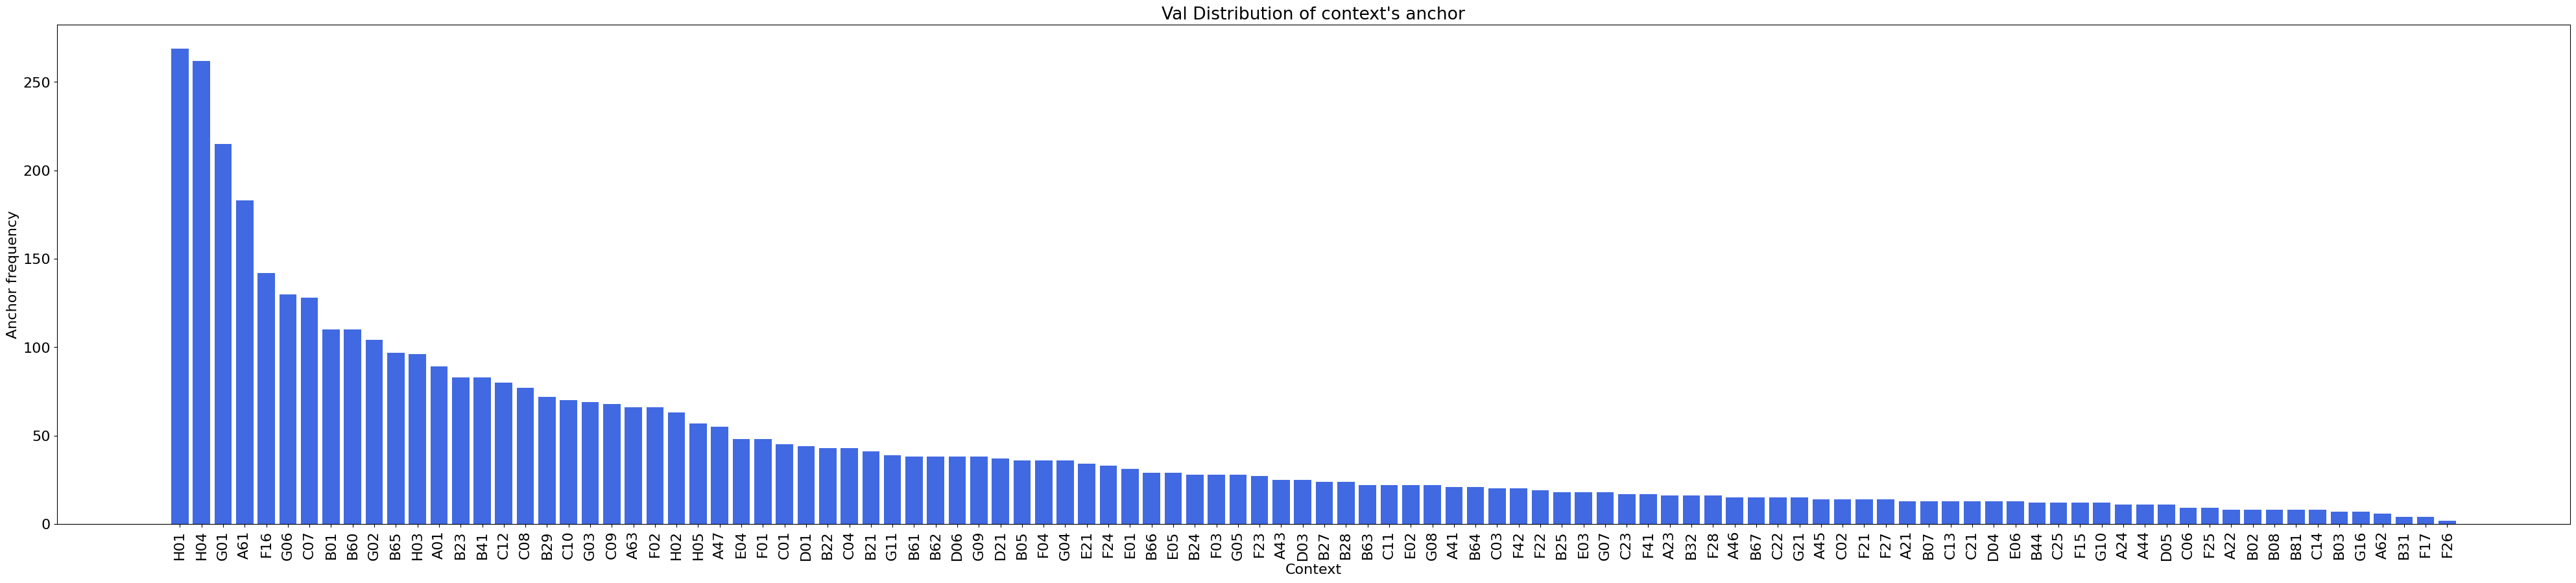

In [20]:
plot_context_anchor_dist(val_df, 'Val')

Stastics on negative example (aka score equals 0)

In [21]:
df_grouped['score'].head()

0        0.50
1        0.75
2        0.25
3        0.50
4        0.00
         ... 
36446    0.00
36447    0.00
36448    0.00
36449    0.00
36450    0.25
Name: score, Length: 7655, dtype: float64

In [22]:
df_score_grouped= df[df['score']==0.00].groupby('anchor_context')[['anchor_context','score']]

In [23]:
def plot0score(stats_df:pd.DataFrame, threshold:int=-1):
    """generated the 

    Args:
        stats_df (pd.DataFrame): data frame containing statistics to be plotted
        threshold (float): threshold used to discard frequency of 0-score values per context's anchor
    """
    tmp = stats_df.count()
    
    tmp_dict = tmp[['anchor_context', 'score']].to_dict()
    tmp_stats =tmp_dict['anchor_context']
    
    print(tmp_stats)

    data_score = dict(sorted(tmp_stats.items(), key=lambda item: item[1], reverse=True))
    if threshold>0:
        data_score = dict(filter(lambda it: it[1]< threshold, data_score.items()))
    
    # data_score = tmp_stats
    plt.rcParams.update({'font.size': 16})   

    n = len(data_score.keys())
    print(f'number of context\'s anchors are {n}')
    plt.figure(figsize=(n//5, 30))
    plt.bar(data_score.keys(), data_score.values(), align='center', color='royalblue')
    plt.xlabel('Anchor context')
    plt.ylabel('Frequency of 0-score')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

    plt.title(f'Distribution of negative examples per context\'s anchor')

plot0score(df_score_grouped)

{'abatement;A47': 6, 'abatement;F16': 1, 'abatement;F24': 6, 'abnormal position;D03': 8, 'abnormal position;E03': 6, 'absorbent properties;C08': 6, 'absorbent properties;D01': 6, 'acan;C07': 6, 'accept information;A45': 6, 'achieve authentication;H04': 6, 'acid absorption;B01': 6, 'acid absorption;B08': 6, 'ack;G04': 6, 'ack;G06': 6, 'acoustooptic modulator;H01': 6, 'acrylate groups;D21': 7, 'activating position;A61': 3, 'activating position;B65': 6, 'activating position;G06': 6, 'acylate with acids;C07': 6, 'adapt for learning;G16': 6, 'adaptive linear;G01': 7, 'adaptive linear;H04': 5, 'adhesive mounting;A47': 6, 'adjacent laterally;A41': 6, 'adjacent laterally;B23': 6, 'adjust gas flow;C23': 7, 'adjust gas flow;F23': 5, 'adjustable multiple;B23': 7, 'adjustable multiple;B25': 7, 'aesthetic effects;A63': 6, 'aesthetic effects;D03': 6, 'agitate means;B01': 6, 'agitate means;B28': 6, 'air flow line;B63': 6, 'air flow line;F04': 6, 'air vent openings;B60': 6, 'align with input shaft;F16

Analysis per set

Train-set

In [24]:
df_score_train= df[ (df['score']==0.00) & (df['val']==0)].groupby('anchor_context')[['anchor_context','score']]


Distribution of  tailed elements

{'abatement;A47': 6, 'abatement;F24': 6, 'abnormal position;D03': 7, 'abnormal position;E03': 5, 'absorbent properties;C08': 6, 'absorbent properties;D01': 6, 'acan;C07': 6, 'accept information;A45': 4, 'achieve authentication;H04': 6, 'acid absorption;B01': 4, 'acid absorption;B08': 5, 'ack;G04': 6, 'ack;G06': 6, 'acoustooptic modulator;H01': 6, 'acrylate groups;D21': 7, 'activating position;A61': 2, 'activating position;B65': 6, 'activating position;G06': 6, 'acylate with acids;C07': 6, 'adapt for learning;G16': 4, 'adaptive linear;G01': 6, 'adaptive linear;H04': 5, 'adhesive mounting;A47': 6, 'adjacent laterally;A41': 5, 'adjacent laterally;B23': 5, 'adjust gas flow;C23': 4, 'adjust gas flow;F23': 4, 'adjustable multiple;B23': 7, 'adjustable multiple;B25': 6, 'aesthetic effects;A63': 6, 'aesthetic effects;D03': 4, 'agitate means;B01': 5, 'agitate means;B28': 5, 'air flow line;B63': 5, 'air flow line;F04': 5, 'air vent openings;B60': 5, 'align with input shaft;F16': 5, 'alpha gypsum;

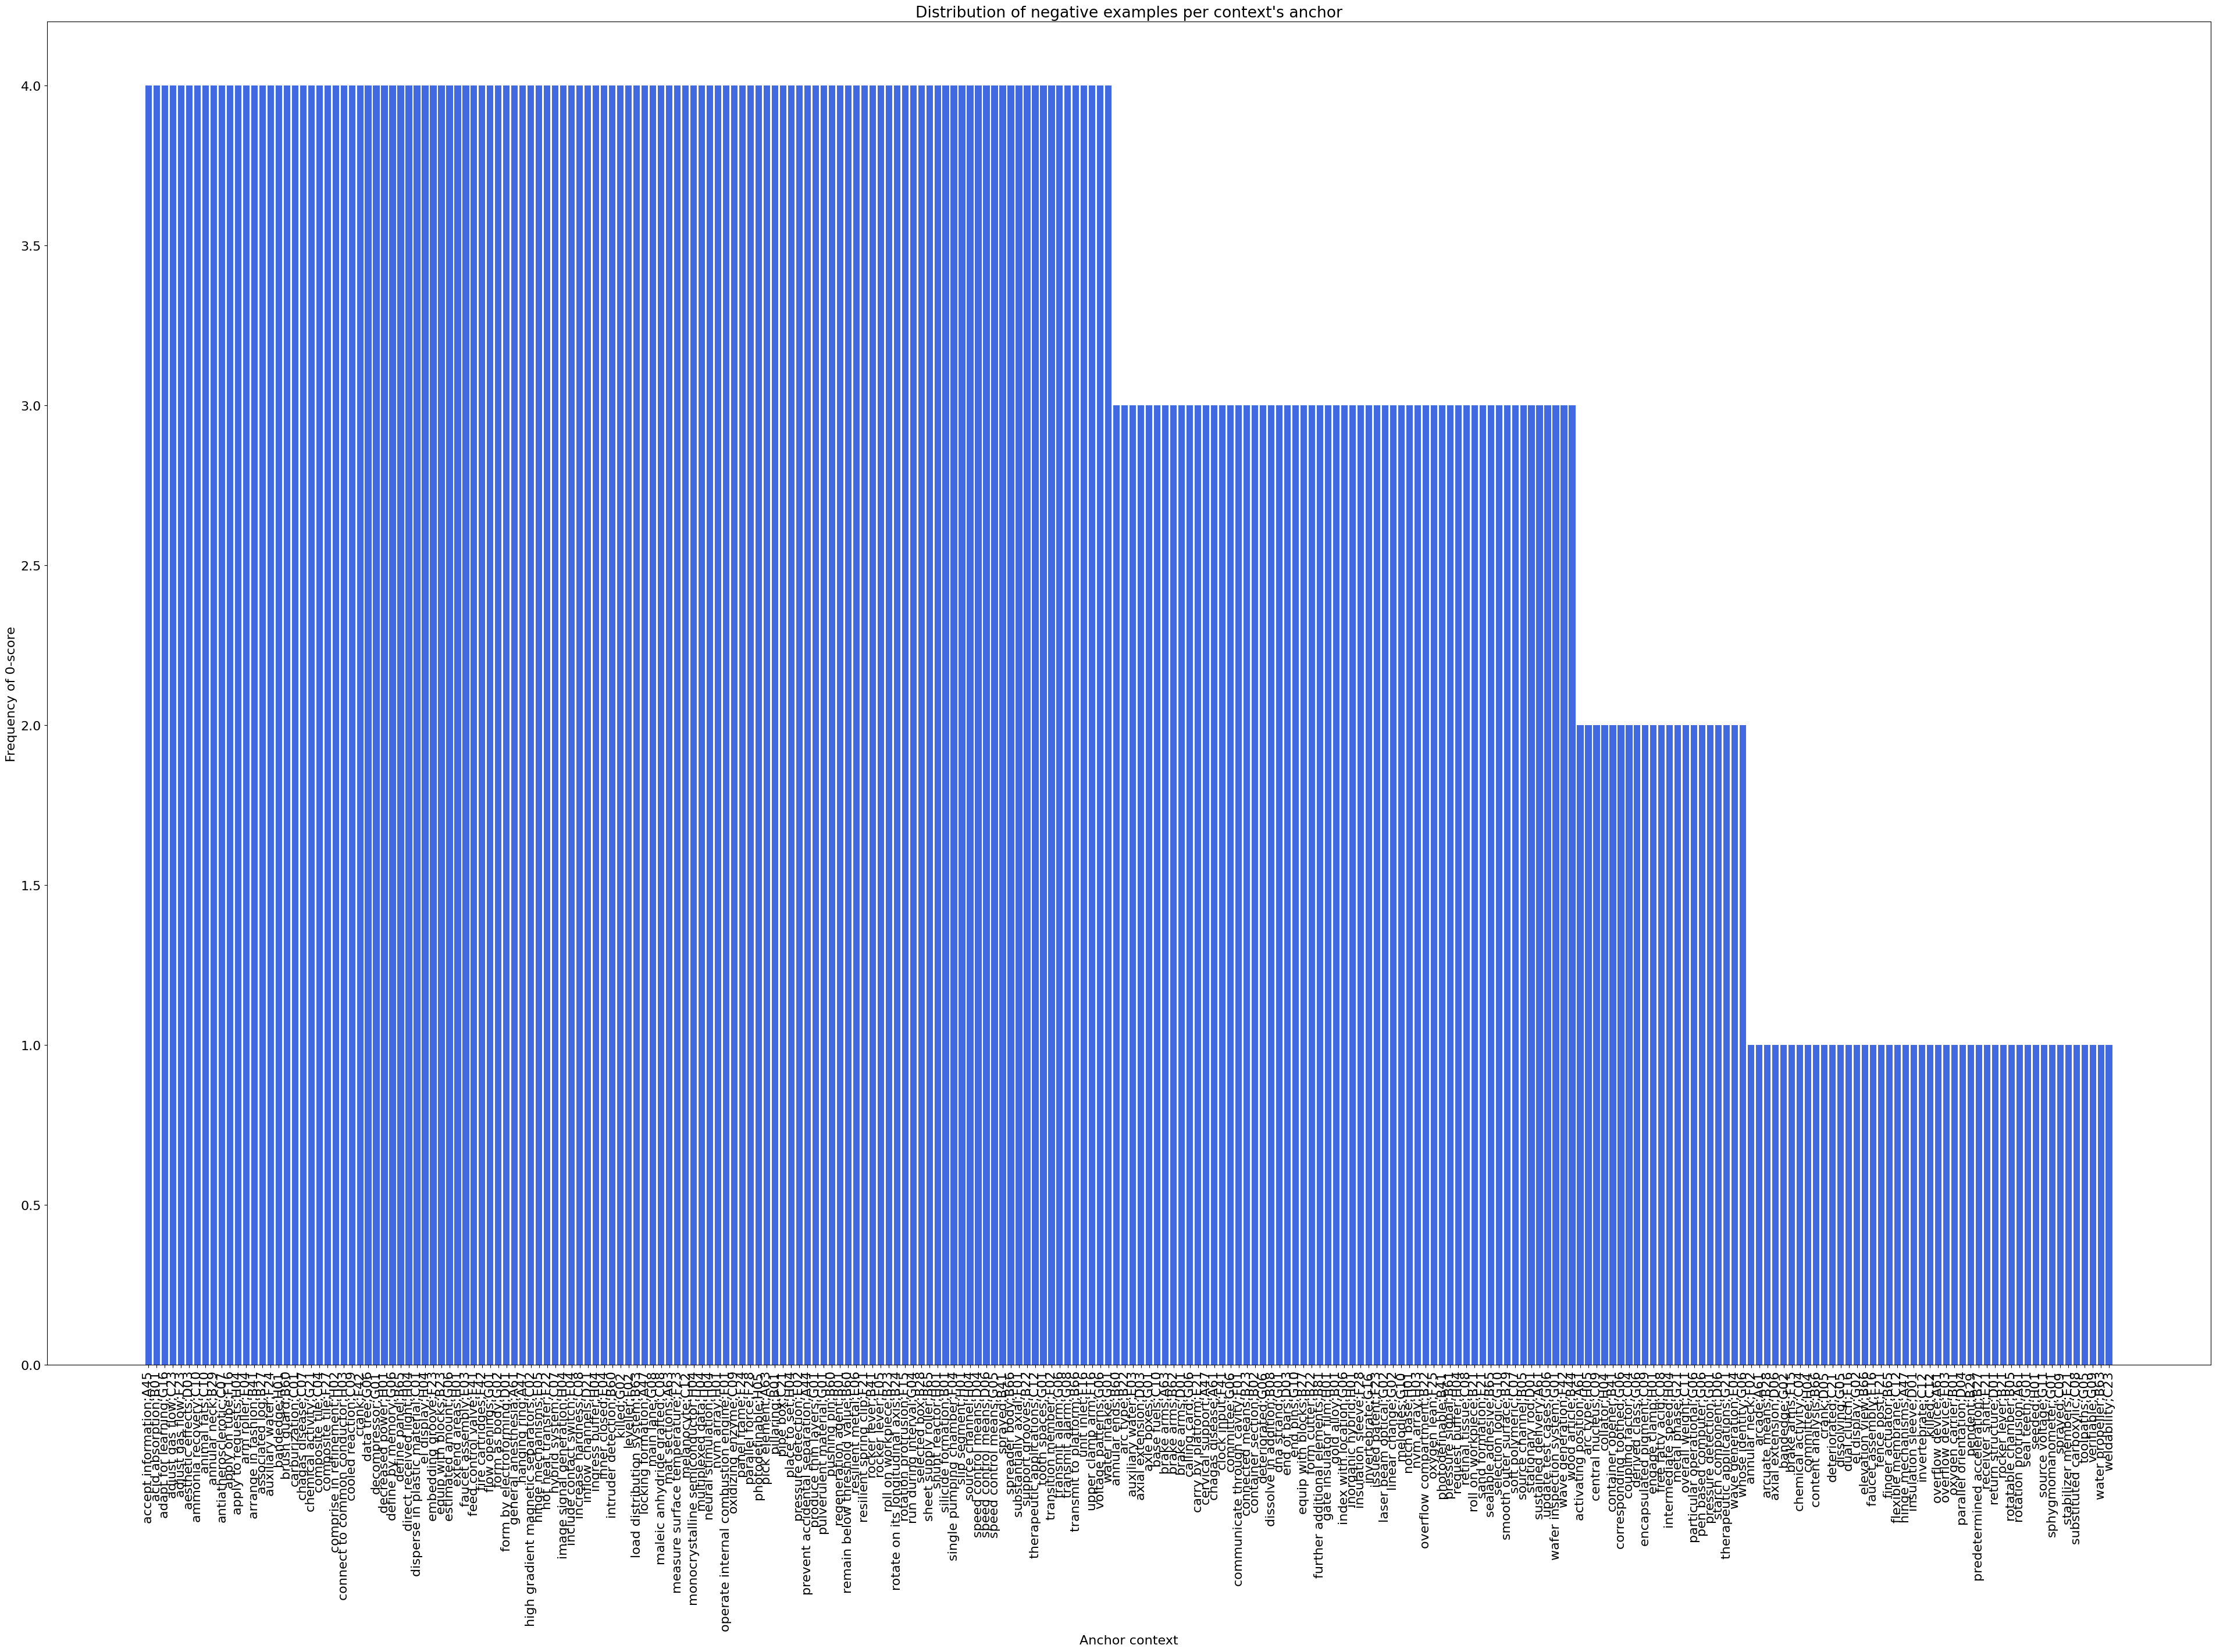

In [25]:
plot0score(df_score_train, threshold=5)

Validation set

{'abatement;F16': 1, 'abnormal position;D03': 1, 'abnormal position;E03': 1, 'accept information;A45': 2, 'acid absorption;B01': 2, 'acid absorption;B08': 1, 'activating position;A61': 1, 'adapt for learning;G16': 2, 'adaptive linear;G01': 1, 'adjacent laterally;A41': 1, 'adjacent laterally;B23': 1, 'adjust gas flow;C23': 3, 'adjust gas flow;F23': 1, 'adjustable multiple;B25': 1, 'aesthetic effects;D03': 2, 'agitate means;B01': 1, 'agitate means;B28': 1, 'air flow line;B63': 1, 'air flow line;F04': 1, 'air vent openings;B60': 1, 'align with input shaft;F16': 1, 'alpha gypsum;B32': 1, 'alphatic;C09': 1, 'aluminium compounds;C07': 1, 'aluminium compounds;C08': 1, 'alumino silicates;C02': 1, 'alumino silicates;G03': 1, 'ammonia recovery;C01': 1, 'ammonia recovery;C10': 2, 'animal fats;C10': 2, 'annular ends;B60': 3, 'annular neck;B29': 1, 'antiatherosclerotic;C07': 2, 'antidiuretic;C07': 1, 'application messaging;G06': 2, 'apply on tube;F16': 2, 'apply to muscle;A61': 1, 'apply to request

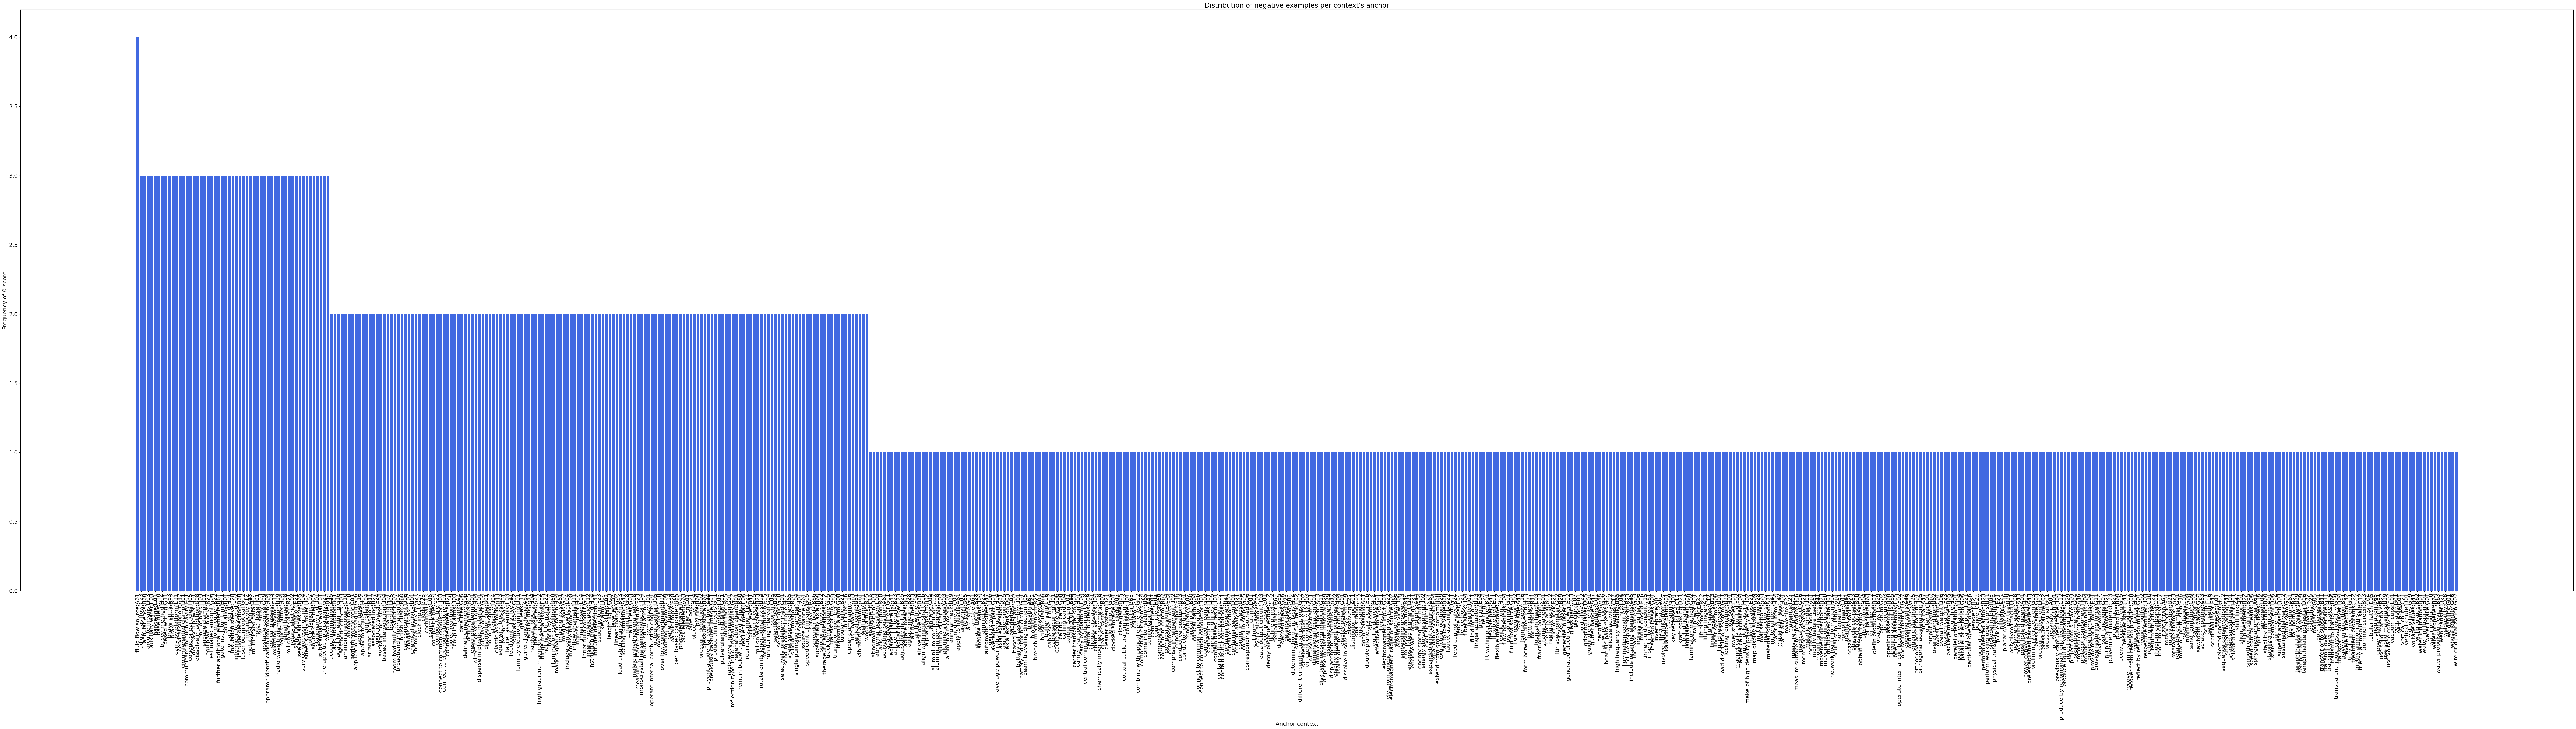

In [26]:
df_score_val = df[ (df['score']==0.00) & (df['val']==1)].groupby('anchor_context')[['anchor_context','score']]
plot0score(df_score_val, threshold=5)